In [1]:
import numpy
import pandas
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import seaborn

In [2]:
plt.rcParams['figure.figsize'] = 16, 9

In [3]:
df = pandas.read_csv('gp.csv', header=0)

In [4]:
df['h']  = pandas.to_timedelta(df['Zeit']) / numpy.timedelta64(1, 'h')

In [5]:
df.to_dense()

,Jahr,Zeit,Link,h
0,2017,1:14:14,http://bern.mikatiming.de/2017/?content=detail...,1.237222
1,2016,1:13:35,http://bern.mikatiming.de/2016/?content=detail...,1.226389
2,2015,1:13:57,http://bern.mikatiming.de/2015/?content=detail...,1.232500
3,2014,1:14:55,http://bern.mikatiming.de/2014/?content=detail...,1.248611
4,2013,1:15:59,http://bern.mikatiming.de/2013/?content=detail...,1.266389
5,2012,1:11:42,http://bern.mikatiming.de/2012/?content=detail...,1.195000
6,2011,NaN,http://bern.mikatiming.de/2011/?content=detail...,NaN
7,2010,NaN,NaN,NaN
8,2009,1:12:39,http://bern.mikatiming.de/2009/?content=detail...,1.210833
9,2008,NaN,NaN,NaN


In [6]:
difference = numpy.max(df['h']) - numpy.min(df['h'])
print('Times vary by %s minutes and %s seconds' % (int(60 * difference),
                                                   int(60 * (60 * difference % int(60 * difference)))))

Times vary by 23 minutes and 34 seconds


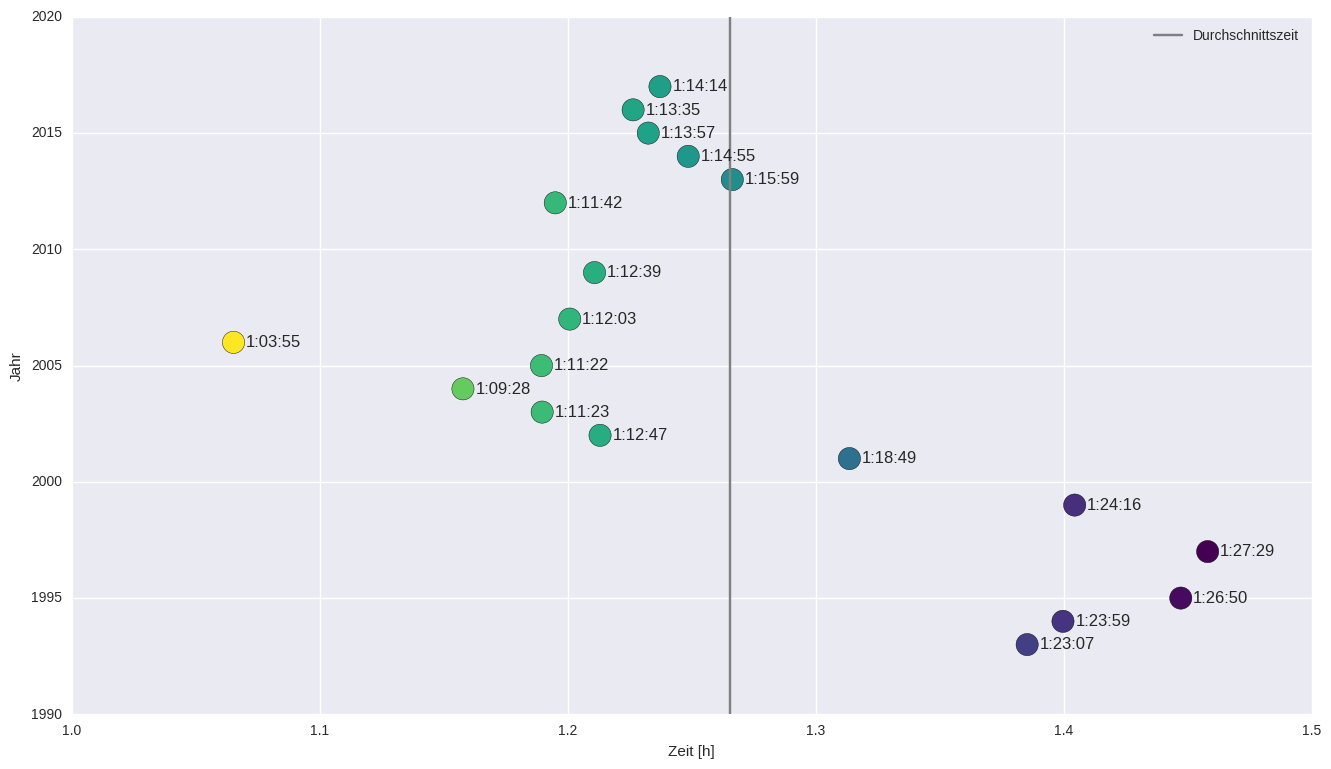

In [7]:
plt.scatter(df['h'], df['Jahr'], cmap='viridis', c=1-df['h'], s=256, label='')
plt.axvline(numpy.nanmean(df['h']), label='Durchschnittszeit', color='gray')
for i, txt in enumerate(df['Zeit']):
    # http://stackoverflow.com/a/37242674/323100
    plt.gca().annotate(txt, (df['h'][i]+0.005, df['Jahr'][i]),
                       horizontalalignment='left',
                       verticalalignment='center')
plt.ylabel('Jahr')
plt.xlabel('Zeit [h]')
plt.legend(loc='best')
plt.show()

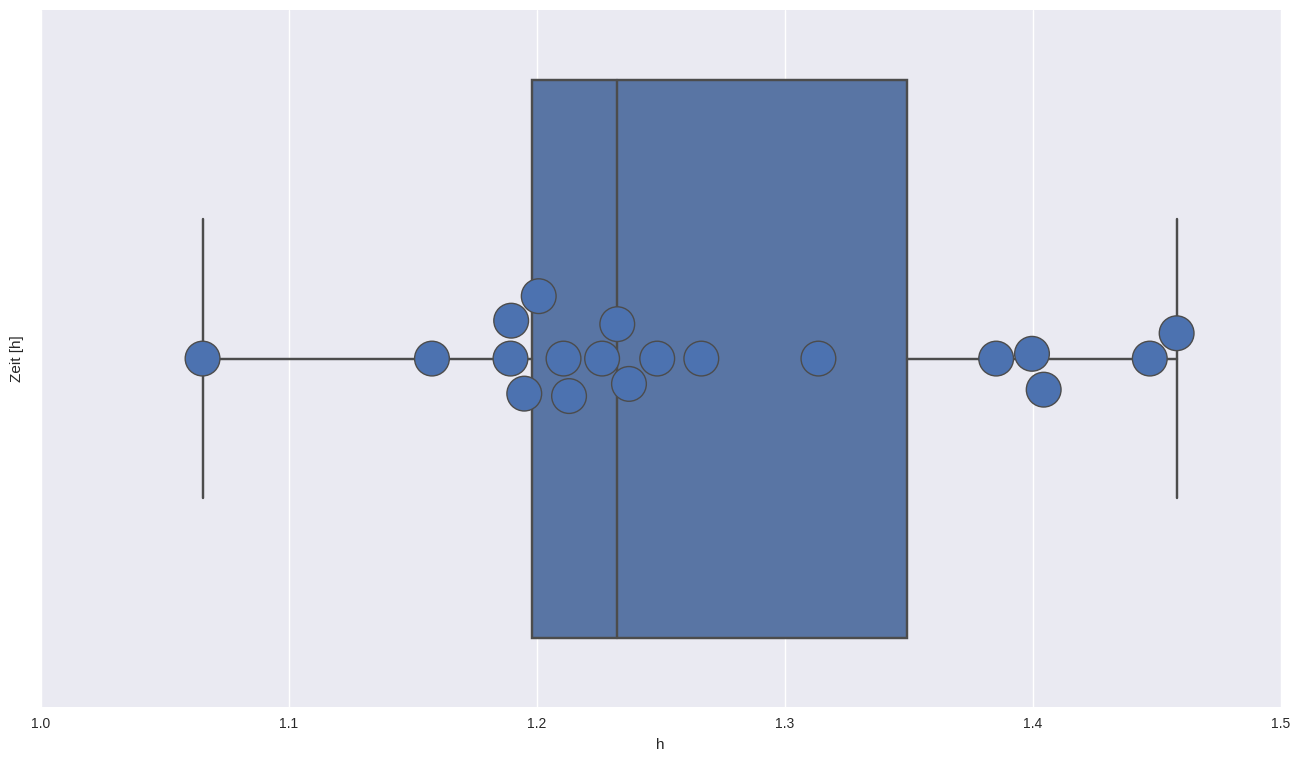

In [8]:
seaborn.boxplot(df['h'])
seaborn.swarmplot(df['h'], size=25, edgecolor='gray', linewidth=1)
plt.ylabel('Zeit [h]')
plt.show()